In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

gamma_gly = pd.read_csv("gamma_gly.csv")
alpha_silica = pd.read_csv("alpha_silica.csv")
alpha_silica_part = pd.read_csv("alpha_silica_part.csv")

#definimos la funcion lorentziana

def lorentzian(x, a, x0):
    return a / ((x-x0)**2 + a**2) / np.pi

# datos "gamma_gly"
xdata1 = gamma_gly["freq"]
ydata1 = gamma_gly["power"]

a_guess1 = 1 / (np.pi * max(ydata1))
x0_guess1 = sum(xdata1 * ydata1) / sum(ydata1)

pguess1 = [a_guess1, x0_guess1]

popt1, pcov1 = curve_fit(lorentzian, xdata1, ydata1, p0 = pguess1)

# Results
a1, x01 = popt1[0], popt1[1]

#datos "alpha_silica"
xdata2 = alpha_silica["freq"]
ydata2 = alpha_silica["power"]

a_guess2 = 1 / (np.pi * max(ydata2))
x0_guess2 = sum(xdata2 * ydata2) / sum(ydata2)

pguess2 = [a_guess2, x0_guess2]

popt2, pcov2 = curve_fit(lorentzian, xdata2, ydata2, p0 = pguess2)

# Results
a2, x02 = popt2[0], popt2[1]

#datos "alpha_silica_part"
xdata3 = alpha_silica_part["freq"]
ydata3 = alpha_silica_part["power"]

a_guess3 = 1 / (np.pi * max(ydata3))
x0_guess3 = sum(xdata3 * ydata3) / sum(ydata3)

pguess3 = [a_guess3, x0_guess3]

popt3, pcov3 = curve_fit(lorentzian, xdata3, ydata3, p0 = pguess3)

# Results
a3, x03 = popt3[0], popt3[1]

In [2]:
A= np.arange(0,25,0.1)
B= np.arange(0,250,0.1)

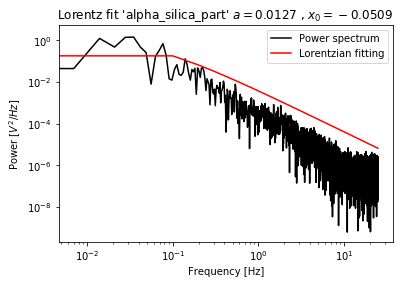

In [3]:
plt.plot(gamma_gly["freq"],gamma_gly["power"],color="black")
plt.plot(A,lorentzian(A,a1,x01), color="red")
plt.legend(['Power spectrum','Lorentzian fitting'])
plt.yscale('log')
plt.xscale('log')
plt.title("Lorentz fit 'alpha_silica_part' $a=0.0127$ , $x_0=-0.0509 $ ")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [$V^2 / Hz$]")
plt.show()

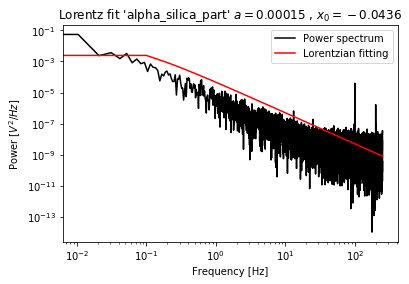

In [4]:
plt.plot(alpha_silica["freq"],alpha_silica["power"],color="black")
plt.plot(B,lorentzian(B,a2,x02),color="red")
plt.legend(['Power spectrum','Lorentzian fitting'])
plt.yscale('log')
plt.xscale('log')
plt.title("Lorentz fit 'alpha_silica_part' $a=0.00015$ , $x_0=-0.0436 $ ")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [$V^2 / Hz$]")
plt.show()

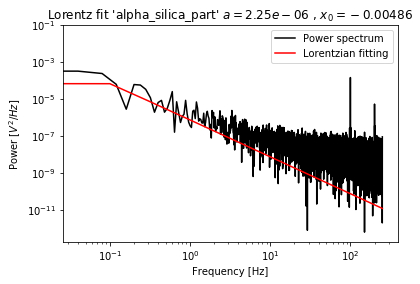

In [5]:
plt.plot(alpha_silica_part["freq"],alpha_silica_part["power"],color="black")
plt.plot(B,lorentzian(B,a3,x03),color="red")
plt.legend(['Power spectrum','Lorentzian fitting'])
plt.yscale('log')
plt.xscale('log')
plt.title("Lorentz fit 'alpha_silica_part' $a=2.25e-06$ , $x_0=-0.00486 $ ")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power [$V^2 / Hz$]")
plt.show()

# Función Lorentziana utilizada

$$\begin{aligned}
f\left(x ; x_{0}, a\right) &=\frac{1}{\pi a\left[1+\left(\frac{x-x_{0}}{a}\right)^{2}\right]} \\
&=\frac{1}{\pi}\left[\frac{a}{\left(x-x_{0}\right)^{2}+a^{2}}\right]
\end{aligned}$$